In [1]:
import math
from scipy import optimize
import numpy as np

In [2]:
import matplotlib.pyplot as plt

params = {'legend.fontsize': 14,
          'figure.figsize': (14, 8),
         'axes.labelsize': 14,
         'axes.titlesize': 14,
         'xtick.labelsize': 12,
         'ytick.labelsize': 12}
plt.rcParams.update(params)

In [3]:
eps = 0.001

This wrapper counts the number of function invocations.

In [4]:
class InvocationsCounter:
    def __init__(self, f):
        self.f = f
        self.count = 0
    
    def __call__(self, x, *params):
        self.count += 1
        return self.f(x)

In [5]:
import random

In [6]:
def f(x):
    fv = 1 / (x ** 2 - 3 * x + 2)
    return min(100, max(-100, fv))

n = 1000
xs = np.array([3 * k / n for k in range(n + 1)])
ys = np.array([f(x) + random.gauss(0, 1) for x in xs])

In [7]:
import matplotlib.pyplot as plt

def plot_parts(xs_, ys_, color, label):
    xs_, ys_ = np.array(xs_), np.array(ys_)
    left, mid, right = xs_ < 1, np.logical_and(xs_ >= 1, xs_ <= 2), xs_ > 2
    plt.plot(xs_[left], ys_[left], color, label=label)
    plt.plot(xs_[mid], ys_[mid], color)
    plt.plot(xs_[right], ys_[right], color)

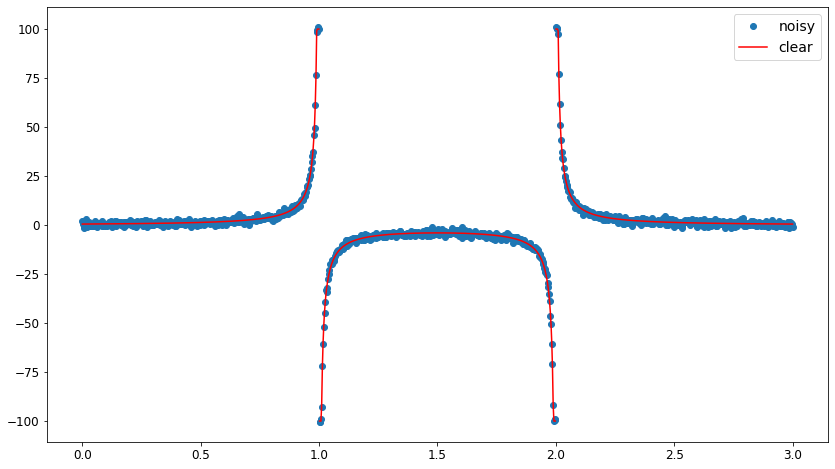

In [8]:
plt.plot(xs, ys, 'o', label='noisy')
plot_parts(xs, [f(x) for x in xs], 'r', 'clear')

plt.legend()
plt.show()

uncut function error 2006692.4224263227
cut function error 1002.2494826043949
Nelder-Mead      : a=-0.001929, b=-0.000819, c=-2.021011, d=1.021145 D(a, b, c, d)=234199.679725; f calculations 434; iterations 255
Levenberg-Marquardt: : a=-0.079475, b=-0.236735, c=-0.713507, d=0.439509 D(a, b, c, d)=267576.941389; f calculations 14; iterations 12; f' calculations 5
anneal           : a=-1.000000, b=1.000488, c=-2.000925, d=1.000941 D(a, b, c, d)=135417.543124; f calculations 2456; iterations 200
differential evolution: a=-0.443817, b=0.438450, c=-2.028636, d=1.029071 D(a, b, c, d)=220672.823401; f calculations 900; iterations 9


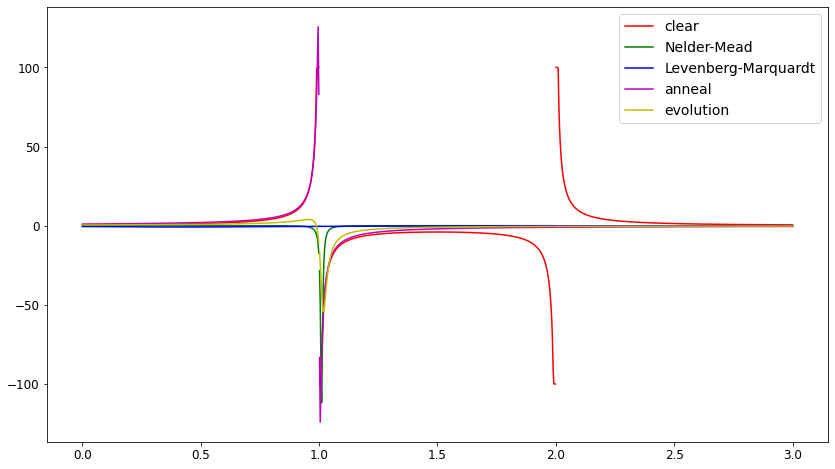

In [20]:
def F(x, a, b, c, d):
    return (a * x + b) / (x ** 2 + c * x + d)

def D(a, b, c, d):
    return sum([(F(x, a, b, c, d) - y) ** 2 for x, y in zip(xs, ys)])

print("uncut function error", D(0.0, 1.0, -3.0, 2.0))
print("cut function error", sum([(f(x) - y) ** 2 for x, y in zip(xs, ys)]))

d = lambda z: D(z[0], z[1], z[2], z[3])
z0 = (1.0, 0.0, -1.0, 1.0)

plot_parts(xs, [f(x) for x in xs], 'r', 'clear')

counter = InvocationsCounter(d)
sol = optimize.minimize(counter, z0, method='Nelder-Mead', tol=eps)
print("Nelder-Mead      : a=%f, b=%f, c=%f, d=%f D(a, b, c, d)=%f; f calculations %d; iterations %d" % (sol.x[0], sol.x[1], sol.x[2], sol.x[3], d(sol.x), counter.count, sol.nit))
plot_parts(xs, [F(x, sol.x[0], sol.x[1], sol.x[2], sol.x[3]) for x in xs], 'g', 'Nelder-Mead')

counter = InvocationsCounter(lambda z: [F(x, z[0], z[1], z[2], z[3]) - y for x, y in zip(xs, ys)])
jac_counter = InvocationsCounter(lambda z: [[
    x / (x ** 2 + z[2] * x + z[3]),
    1 / (x ** 2 + z[2] * x + z[3]),
    -x / (x ** 2 + z[2] * x + z[3]) ** 2,
    -1 / (x ** 2 + z[2] * x + z[3]) ** 2
] for x in xs])
sol = optimize.least_squares(counter, z0, method='lm', xtol=eps, jac=jac_counter)
print("Levenberg-Marquardt: : a=%f, b=%f, c=%f, d=%f D(a, b, c, d)=%f; f calculations %d; iterations %d; f' calculations %d" % (sol.x[0], sol.x[1], sol.x[2], sol.x[3], d(sol.x), counter.count, sol.nfev, jac_counter.count))
plot_parts(xs, [F(x, sol.x[0], sol.x[1], sol.x[2], sol.x[3]) for x in xs], 'b', label='Levenberg-Marquardt')

counter = InvocationsCounter(d)
sol = optimize.dual_annealing(counter, bounds=((-1, 1), (0, 2), (-4, -2), (1, 3)), maxiter=200)
print("anneal           : a=%f, b=%f, c=%f, d=%f D(a, b, c, d)=%f; f calculations %d; iterations %d" % (sol.x[0], sol.x[1], sol.x[2], sol.x[3], d(sol.x), counter.count, sol.nit))
plot_parts(xs, [F(x, sol.x[0], sol.x[1], sol.x[2], sol.x[3]) for x in xs], 'm', 'anneal')

counter = InvocationsCounter(d)
sol = optimize.differential_evolution(counter, bounds=((-1, 1), (0, 2), (-4, -2), (1, 3)), maxiter=200)
print("differential evolution: a=%f, b=%f, c=%f, d=%f D(a, b, c, d)=%f; f calculations %d; iterations %d" % (sol.x[0], sol.x[1], sol.x[2], sol.x[3], D(sol.x[0], sol.x[1], sol.x[2], sol.x[3]), counter.count, sol.nit))
plot_parts(xs, [F(x, sol.x[0], sol.x[1], sol.x[2], sol.x[3]) for x in xs], 'y', 'evolution')


plt.legend()
plt.show()

15 cities dataset from [here](https://people.sc.fsu.edu/~jburkardt/datasets/cities/lau15_xy.txt)

In [10]:
xy_txt = """
  x             y
  0.549963E-07  0.985808E-08
  -28.8733     -0.797739E-07
  -79.2916      -21.4033    
  -14.6577      -43.3896    
  -64.7473       21.8982    
  -29.0585      -43.2167    
  -72.0785      0.181581    
  -36.0366      -21.6135    
  -50.4808       7.37447    
  -50.5859      -21.5882    
 -0.135819      -28.7293    
  -65.0866      -36.0625    
  -21.4983       7.31942    
  -57.5687      -43.2506    
  -43.0700       14.5548
"""

In [11]:
from io import StringIO
import pandas as pd

df = pd.read_csv(StringIO(xy_txt), sep="\s+")
df

,x,y
0,5.499630e-08,9.858080e-09
1,-2.887330e+01,-7.977390e-08
2,-7.929160e+01,-2.140330e+01
3,-1.465770e+01,-4.338960e+01
4,-6.474730e+01,2.189820e+01
5,-2.905850e+01,-4.321670e+01
6,-7.207850e+01,1.815810e-01
7,-3.603660e+01,-2.161350e+01
8,-5.048080e+01,7.374470e+00
9,-5.058590e+01,-2.158820e+01


In [12]:
c = df.to_numpy()
x, y = np.hsplit(c, (1, ))
x, y = x.flatten(), y.flatten()

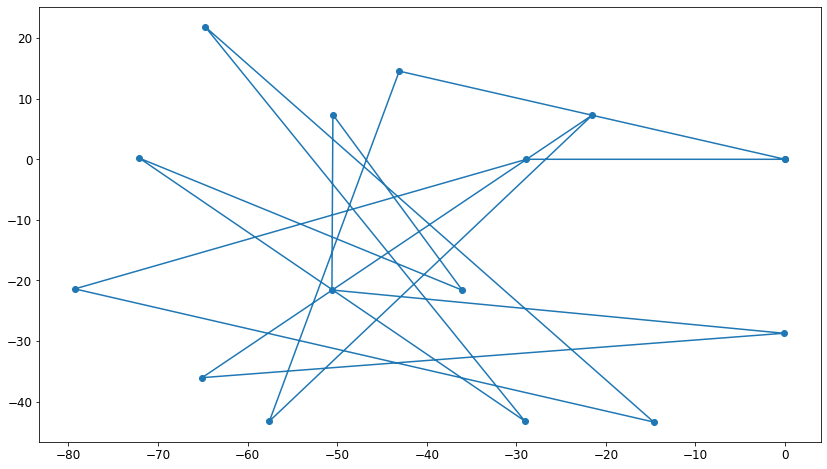

In [13]:
import math

dist = [[math.sqrt((x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2) for j in range(len(x))] for i in range(len(x))]

def plot_route(seq):
    seq = seq + [seq[0]]
    plt.plot(x[seq], y[seq], 'o-')
    plt.show()
    
def calc_dist(seq):
    n = len(seq)
    d = 0.0
    for i in range(n):
        d += dist[seq[i]][seq[(i + 1) % n]]
    return d

initial_seq = list(range(len(x)))

plot_route(initial_seq)    

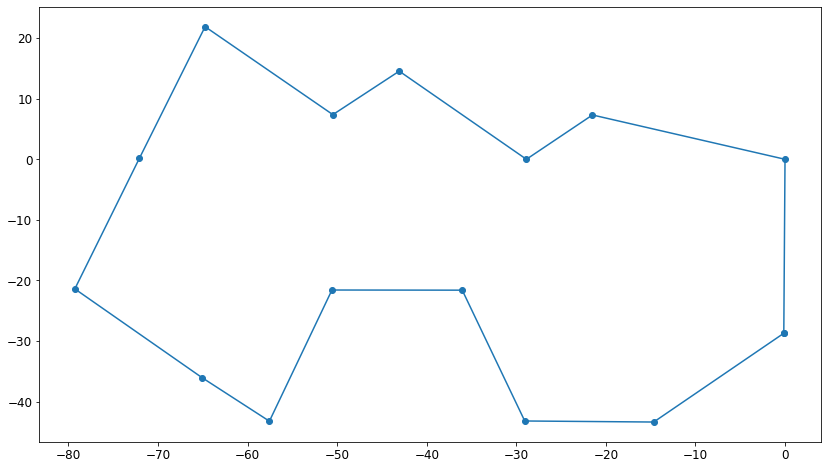

284.38109040799134
[10, 0, 12, 1, 14, 8, 4, 6, 2, 11, 13, 9, 7, 5, 3]


In [15]:
import math

cur_seq = initial_seq
best_dist = calc_dist(cur_seq)
indices = list(range(len(cur_seq)))
for i in range(10000):
    new_seq = cur_seq.copy()
    i, j = np.random.choice(indices, 2, replace=False)
    new_seq[i], new_seq[j] = new_seq[j], new_seq[i]
    d = calc_dist(new_seq)
    t = 10 / (i + 1)
    if d < best_dist:
        cur_seq = new_seq
        best_dist = d
    elif np.random.rand() < math.exp(-(d - best_dist) / t):
        cur_seq = new_seq
        best_dist = d

plot_route(cur_seq)
print(best_dist)
print(cur_seq)